In [40]:
from dotenv import load_dotenv
load_dotenv()
from e2b_code_interpreter import Sandbox

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys


In [51]:
df=pd.read_csv("/Users/shivanshmahajan/Desktop/data_agent/e2b/Train_Data.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [44]:
# Create sandbox
sbx = Sandbox()

In [45]:
# Upload the dataset to the sandbox
dataset_path_in_sandbox = "/Users/shivanshmahajan/Desktop/data_agent/e2b/Train_Data.csv"
with open("Train_Data.csv", "rb") as f:
    dataset_path_in_sandbox = sbx.files.write("Train_Data.csv", f)

In [53]:
def run_ai_generated_code(ai_generated_code: str):
    print('Running the code in the sandbox....')
    execution = sbx.run_code(ai_generated_code)
    print('Code execution finished!')

    # First let's check if the code ran successfully.
    if execution.error: 
        print('AI-generated code had an error.') 
        print(execution.error.name) 
        print(execution.error.value) 
        print(execution.error.traceback) 
        sys.exit(1) 

    # Iterate over all the results and specifically check for png files that will represent the chart.
    result_idx = 0 
    for result in execution.results: 
        if result.png: 
            # Save the png to a file
            # The png is in base64 format.
            with open(f'chart-{result_idx}.png', 'wb') as f: 
                f.write(base64.b64decode(result.png)) 
            print(f'Chart saved to chart-{result_idx}.png') 
            result_idx += 1 

In [54]:
from anthropic import Anthropic

prompt = '''
I have a CSV file about movies. It has about 10k rows. It's saved in the sandbox at {datasetPathInSandbox.path}.
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)

I want to  get analysis of most smokers and average BMI gruoped under sex. Write Python code that analyzes the dataset based on my request and produces right chart accordingly'''

anthropic = Anthropic()
msg = anthropic.messages.create(
  model='claude-3-7-sonnet-20250219',
  max_tokens=1024,
  messages=[
    {"role": "user", "content": prompt}
  ]
)

In [55]:
msg = anthropic.messages.create(
  model='claude-3-7-sonnet-20250219',
  max_tokens=1024,
  messages=[
    {"role": "user", "content": prompt}
  ],
  tools=[ 
    { 
      "name": "run_python_code", 
      "description": "Run Python code", 
      "input_schema": { 
        "type": "object", 
        "properties": { 
          "code": { "type": "string", "description": "The Python code to run" }, 
        }, 
        "required": ["code"], 
      }, 
    }, 
  ], 
)

In [56]:
for content_block in msg.content:
    if content_block.type == 'tool_use':
        if content_block.name == 'run_python_code':
            code = content_block.input['code']
            print('Will run following code in the sandbox', code)
            # Execute the code in the sandbox
            run_ai_generated_code(code)


Will run following code in the sandbox import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List files in the current directory to locate the dataset
print("Files in current directory:", os.listdir())

# Since the exact path wasn't specified, let's try to find the file
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
print("CSV files found:", csv_files)

# Assuming the first CSV file is our dataset
if csv_files:
    file_path = csv_files[0]
    print(f"Using file: {file_path}")
    
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Display basic info
    print("Dataset shape:", df.shape)
    print("\nData sample:")
    print(df.head())
    
    # Analysis 1: Smokers count by sex
    smokers_by_sex = df.groupby(['sex', 'smoker']).size().unstack()
    print("\nSmokers count by sex:")
    print(smokers_by_sex)
    
    # Analysis 2: Average BMI by sex
    avg_bmi_by_sex = df.groupby('sex')['bmi'].mean()
    print("\nAverage BMI 

TimeoutException: {"message":"Sandbox not found","sandboxId":"iss793qsn5z95f5xpzon6","code":0}: This error is likely due to sandbox timeout. You can modify the sandbox timeout by passing 'timeout' when starting the sandbox or calling '.set_timeout' on the sandbox with the desired timeout.

Files in current directory: ['charts', 'test.py', 'Train_Data.csv', 'test.ipynb']
CSV files found: ['Train_Data.csv']
Using file: Train_Data.csv
Dataset shape: (3630, 7)

Data sample:
         age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900

Smokers count by sex:
smoker    no  yes
sex              
female  1405  196
male    1665  364

Average BMI by sex:
sex
female    30.698342
male      30.575453
Name: bmi, dtype: float64


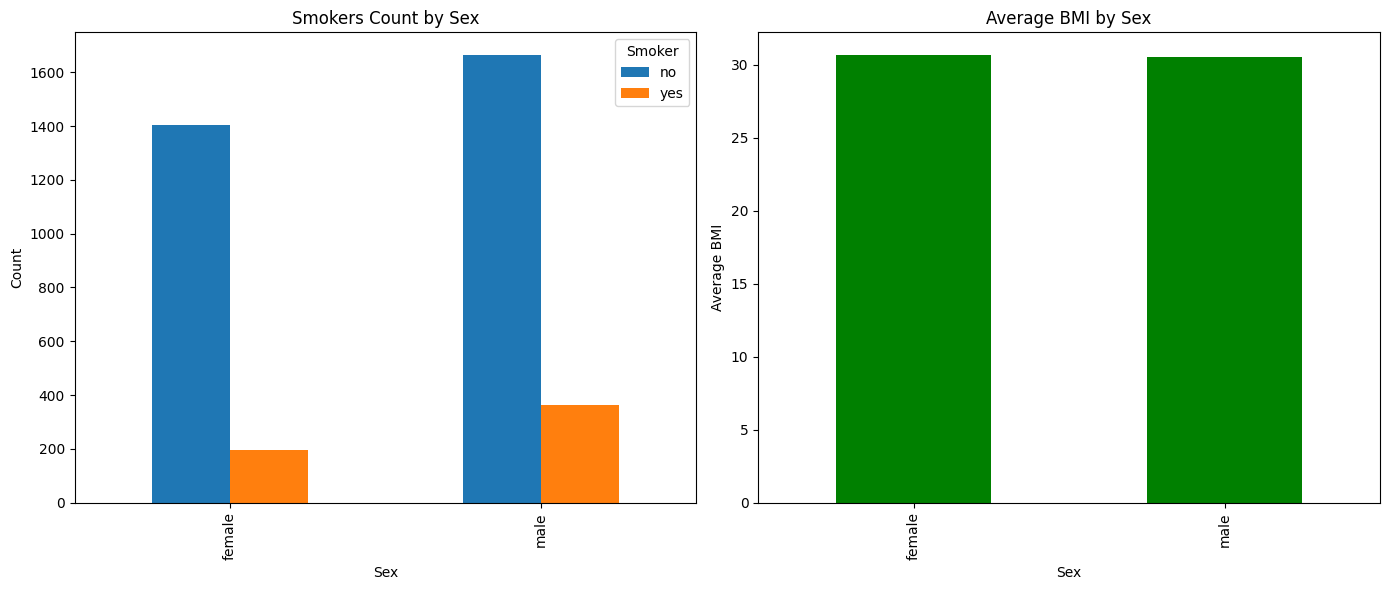

<Figure size 1000x600 with 0 Axes>

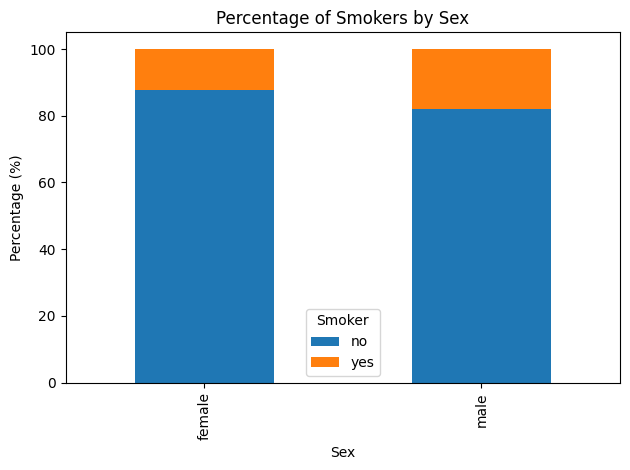

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List files in the current directory to locate the dataset
print("Files in current directory:", os.listdir())

# Since the exact path wasn't specified, let's try to find the file
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
print("CSV files found:", csv_files)

# Assuming the first CSV file is our dataset
if csv_files:
    file_path = csv_files[0]
    print(f"Using file: {file_path}")
    
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Display basic info
    print("Dataset shape:", df.shape)
    print("\nData sample:")
    print(df.head())
    
    # Analysis 1: Smokers count by sex
    smokers_by_sex = df.groupby(['sex', 'smoker']).size().unstack()
    print("\nSmokers count by sex:")
    print(smokers_by_sex)
    
    # Analysis 2: Average BMI by sex
    avg_bmi_by_sex = df.groupby('sex')['bmi'].mean()
    print("\nAverage BMI by sex:")
    print(avg_bmi_by_sex)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Smokers by sex
    smokers_by_sex.plot(kind='bar', ax=ax1)
    ax1.set_title('Smokers Count by Sex')
    ax1.set_xlabel('Sex')
    ax1.set_ylabel('Count')
    ax1.legend(title='Smoker')
    
    # Plot 2: Average BMI by sex
    avg_bmi_by_sex.plot(kind='bar', ax=ax2, color='green')
    ax2.set_title('Average BMI by Sex')
    ax2.set_xlabel('Sex')
    ax2.set_ylabel('Average BMI')
    
    plt.tight_layout()
    plt.savefig('analysis_results.png')
    plt.show()
    
    # Additional visualization: Smoker percentage by sex
    smoker_percent = (df.groupby(['sex', 'smoker']).size() / 
                      df.groupby('sex').size()).unstack() * 100
    
    plt.figure(figsize=(10, 6))
    smoker_percent.plot(kind='bar', stacked=True)
    plt.title('Percentage of Smokers by Sex')
    plt.xlabel('Sex')
    plt.ylabel('Percentage (%)')
    plt.legend(title='Smoker')
    plt.tight_layout()
    plt.savefig('smoker_percentage.png')
    plt.show()
else:
    print("No CSV file found. Please check the file path.")